In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath

from dask.distributed import Client 
from dask.distributed import LocalCluster 

cluster = LocalCluster()
client = Client(cluster) 
client

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36326 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:36326/status,
Dashboard: http://127.0.0.1:36326/status,Workers: 4
Total threads: 8,Total memory: 30.94 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43812,Workers: 4
Dashboard: http://127.0.0.1:36326/status,Total threads: 8
Started: Just now,Total memory: 30.94 GiB
Comm: tcp://127.0.0.1:35341,Total threads: 2
Dashboard: http://127.0.0.1:45410/status,Memory: 7.73 GiB
Nanny: tcp://127.0.0.1:38800,


### Load salinity output for control and last 20 years of the perturbation experiments

In [142]:
S_cntrl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ocean_annual_z.0281-0380.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126,'time':20})
## stress
S_stress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_output/ocean_annual_z.0051-0070.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_stress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_290/ocean_annual_z.0051-0070.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_stress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_332/ocean_annual_z.0051-0070.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
## antwater
S_antwater_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_output/ocean_annual_z.0051-0070.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_antwater_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_290/ocean_annual_z.0051-0070.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_antwater_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_332/ocean_annual_z.0051-0070.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
## antwater-stress
S_antwaterstress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_output/ocean_annual_z.0051-0070.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_antwaterstress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_290/ocean_annual_z.0051-0070.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
S_antwaterstress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_332/ocean_annual_z.0051-0070.so.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})

### Load potential temperature output for control and last 20 years of the perturbation experiments

In [143]:
T_cntrl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ocean_annual_z.0251-0405.thetao.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30),time=slice('0281-07-02','0380-07-02')).chunk({'yh':126,'time':20})
## stress
T_stress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_output/ocean_annual_z.0001-0070.thetao.nc',
                               drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30),time=slice('0051-07-02','0070-07-02')).chunk({'yh':126})
T_stress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_290/ocean_annual_z.0051-0070.thetao.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_stress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_332/ocean_annual_z.0051-0070.thetao.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
## antwater
T_antwater_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_output/ocean_annual_z.0001-0070.thetao.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30),time=slice('0051-07-02','0070-07-02')).chunk({'yh':126})
T_antwater_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_290/ocean_annual_z.0051-0070.thetao.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_antwater_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_332/ocean_annual_z.0051-0070.thetao.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
## antwater-stress
T_antwaterstress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_output/ocean_annual_z.0051-0070.thetao.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_antwaterstress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_290/ocean_annual_z.0051-0070.thetao.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})
T_antwaterstress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_332/ocean_annual_z.0051-0070.thetao.nc',
                                drop_variables=['average_DT', 'average_T1', 'average_T2']).sel(z_l=slice(200,1000),yh=slice(-90,-30)).chunk({'yh':126})

### Load static file and one volcello file for volume-weighting. Note that volcello actually varies in time due to the free surface and Lagrangian vertical coordinate, but for looking at depth-averaged anomalies, assuming volcello is temporally constant is okay.

In [144]:
static_ocean = xr.open_dataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual_z/ocean_annual_z.static.nc')
volume = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_output/ocean_annual_z.0001-0070.volcello.nc',use_cftime=True).isel(time=0)

### Create Ensembles and ensemble means

In [146]:
## Salinity
S_stress_ens = xr.concat([S_stress_251,S_stress_290,S_stress_332],dim='member')
S_antwater_ens = xr.concat([S_antwater_251,S_antwater_290,S_antwater_332],dim='member')
S_antwaterstress_ens = xr.concat([S_antwaterstress_251,S_antwaterstress_290,S_antwaterstress_332],dim='member')

S_stress_ens_mean = S_stress_ens.so.mean(dim='member')
S_antwater_ens_mean = S_antwater_ens.so.mean(dim='member')
S_antwaterstress_ens_mean = S_antwaterstress_ens.so.mean(dim='member')

## Temperature
T_stress_ens = xr.concat([T_stress_251,T_stress_290,T_stress_332],dim='member')
T_antwater_ens = xr.concat([T_antwater_251,T_antwater_290,T_antwater_332],dim='member')
T_antwaterstress_ens = xr.concat([T_antwaterstress_251,T_antwaterstress_290,T_antwaterstress_332],dim='member')

T_stress_ens_mean = T_stress_ens.thetao.mean(dim='member')
T_antwater_ens_mean = T_antwater_ens.thetao.mean(dim='member')
T_antwaterstress_ens_mean = T_antwaterstress_ens.thetao.mean(dim='member')

### Compute ensemble mean difference from piControl 100-year average

In [147]:
S_stress_ens_diff = S_stress_ens_mean.mean(dim='time') - S_cntrl.so.mean(dim='time')
S_antwater_ens_diff = S_antwater_ens_mean.mean(dim='time') - S_cntrl.so.mean(dim='time')
S_antwaterstress_ens_diff = S_antwaterstress_ens_mean.mean(dim='time') - S_cntrl.so.mean(dim='time')

T_stress_ens_diff = T_stress_ens_mean.mean(dim='time') - T_cntrl.thetao.mean(dim='time')
T_antwater_ens_diff = T_antwater_ens_mean.mean(dim='time') - T_cntrl.thetao.mean(dim='time')
T_antwaterstress_ens_diff = T_antwaterstress_ens_mean.mean(dim='time') - T_cntrl.thetao.mean(dim='time')

### Compute volume-weighted depth-average anomalies from 200 m to 1000 m

In [148]:
vol_weights = volume.volcello.sel(yh=slice(-90,-30),z_l=slice(200,1000))
S_stress_ens_diff_weighted = S_stress_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')
S_antwaterstress_ens_diff_weighted = S_antwaterstress_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')
S_antwater_ens_diff_weighted = S_antwater_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')

T_stress_ens_diff_weighted = T_stress_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')
T_antwaterstress_ens_diff_weighted = T_antwaterstress_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')
T_antwater_ens_diff_weighted = T_antwater_ens_diff.weighted(vol_weights.fillna(0)).mean(dim='z_l')

In [149]:
T_stress_ens_diff_weighted

<xarray.DataArray 'thetao' (yh: 378, xh: 1440)>
dask.array<truediv, shape=(378, 1440), dtype=float32, chunksize=(126, 1440), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... -30.46 -30.24 -30.02
    time     object 0001-07-02 12:00:00

### Function to set up Antarctic Polar Projections

In [150]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

depth = static_ocean['deptho']
depth

shelf = depth.where(depth<1000)*0
shelf_mask = shelf.isin(0)

import matplotlib.ticker as mticker

def antarctic_map(ax, grid):
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_extent([-180, 180, -90, -35], ccrs.PlateCarree())
    ax.contour(static_ocean.xh,static_ocean.yh,shelf_mask,colors='black',linewidths = 0.5,transform=ccrs.PlateCarree())
    if grid == True:
        gl = ax.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
        gl.ylocator = mticker.FixedLocator([-90, -80, -70, -60, -50, -40])

### 200 to 1000 m depth-average (volume-weighted) temperature difference from piControl

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/nbhome

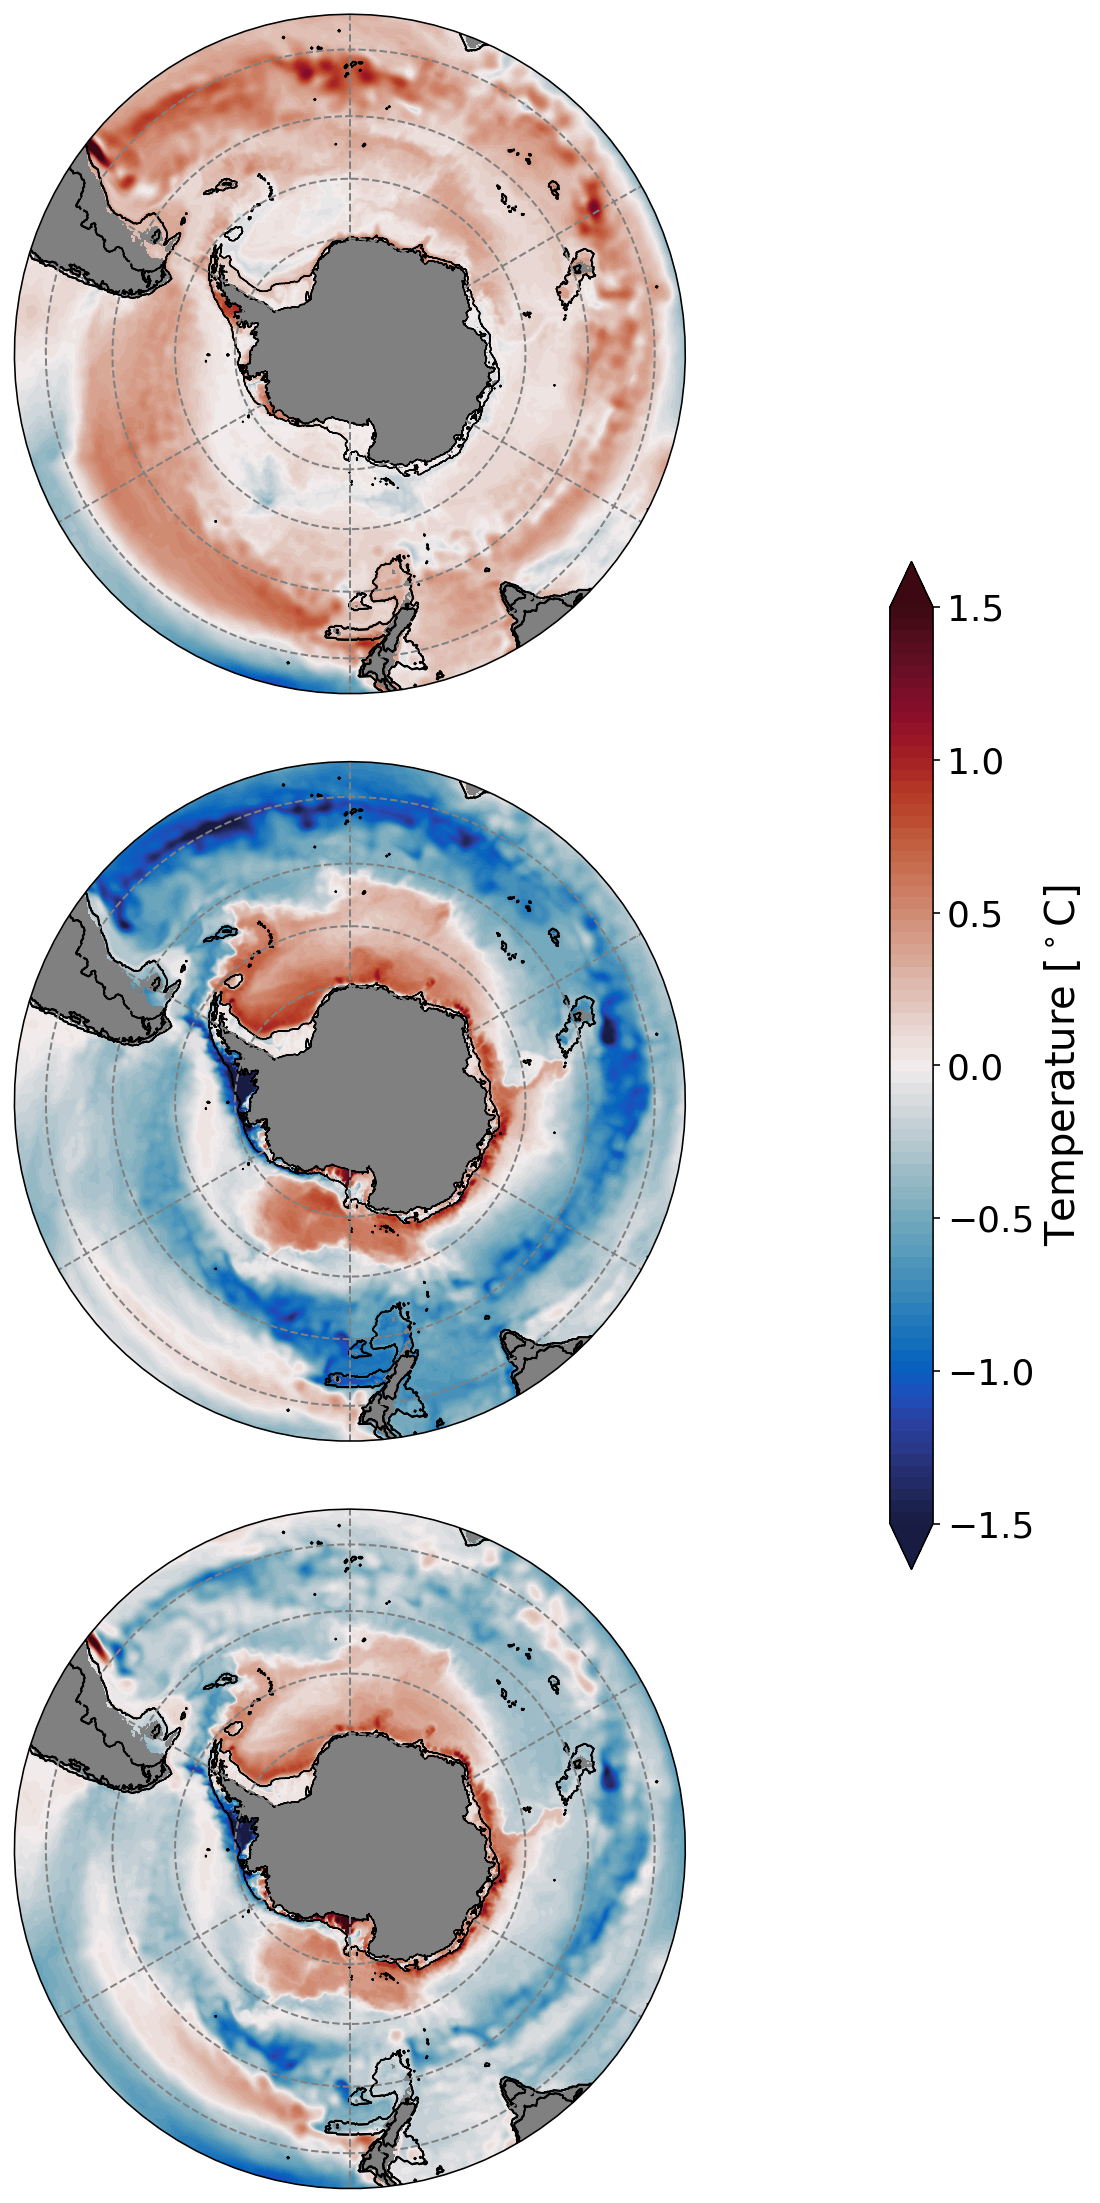

In [151]:
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)
antarctic_map(ax1, grid = True)
antarctic_map(ax2, grid = True)

x_cm4 = ds_static_ocean.xh.values
y_cm4 = ds_static_ocean.yh.sel(yh=slice(-90,-30)).values
x_cm4,y_cm4 = np.meshgrid(x_cm4,y_cm4)

levels_temp_diff = np.linspace(-1.5,1.5,80)

ax0.contourf(x_cm4,y_cm4,T_stress_ens_diff_weighted.values,
             levels=levels_temp_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

ax1.contourf(x_cm4,y_cm4,T_antwater_ens_diff_weighted.values,
             levels=levels_temp_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

ax2.contourf(x_cm4,y_cm4,T_antwaterstress_ens_diff_weighted.values,
             levels=levels_temp_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')


### Add Vertical Colorbar
cbr_temp_diff = ax0.contourf(x_cm4,y_cm4,T_stress_ens_diff_weighted.values,
             levels=levels_temp_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_temp_diff,cax=cax,orientation='vertical',shrink=0.5,ticks = [-1.5,-1.0,-0.5,0,0.5,1.0,1.5])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Temperature [$^\circ$C]', fontsize=20)

plt.savefig('CM4_200_to_1000m_depth_ave_Temp_Anomaly.pdf')

### 200 to 1000 m depth-average (volume-weighted) salinity difference from piControl

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings

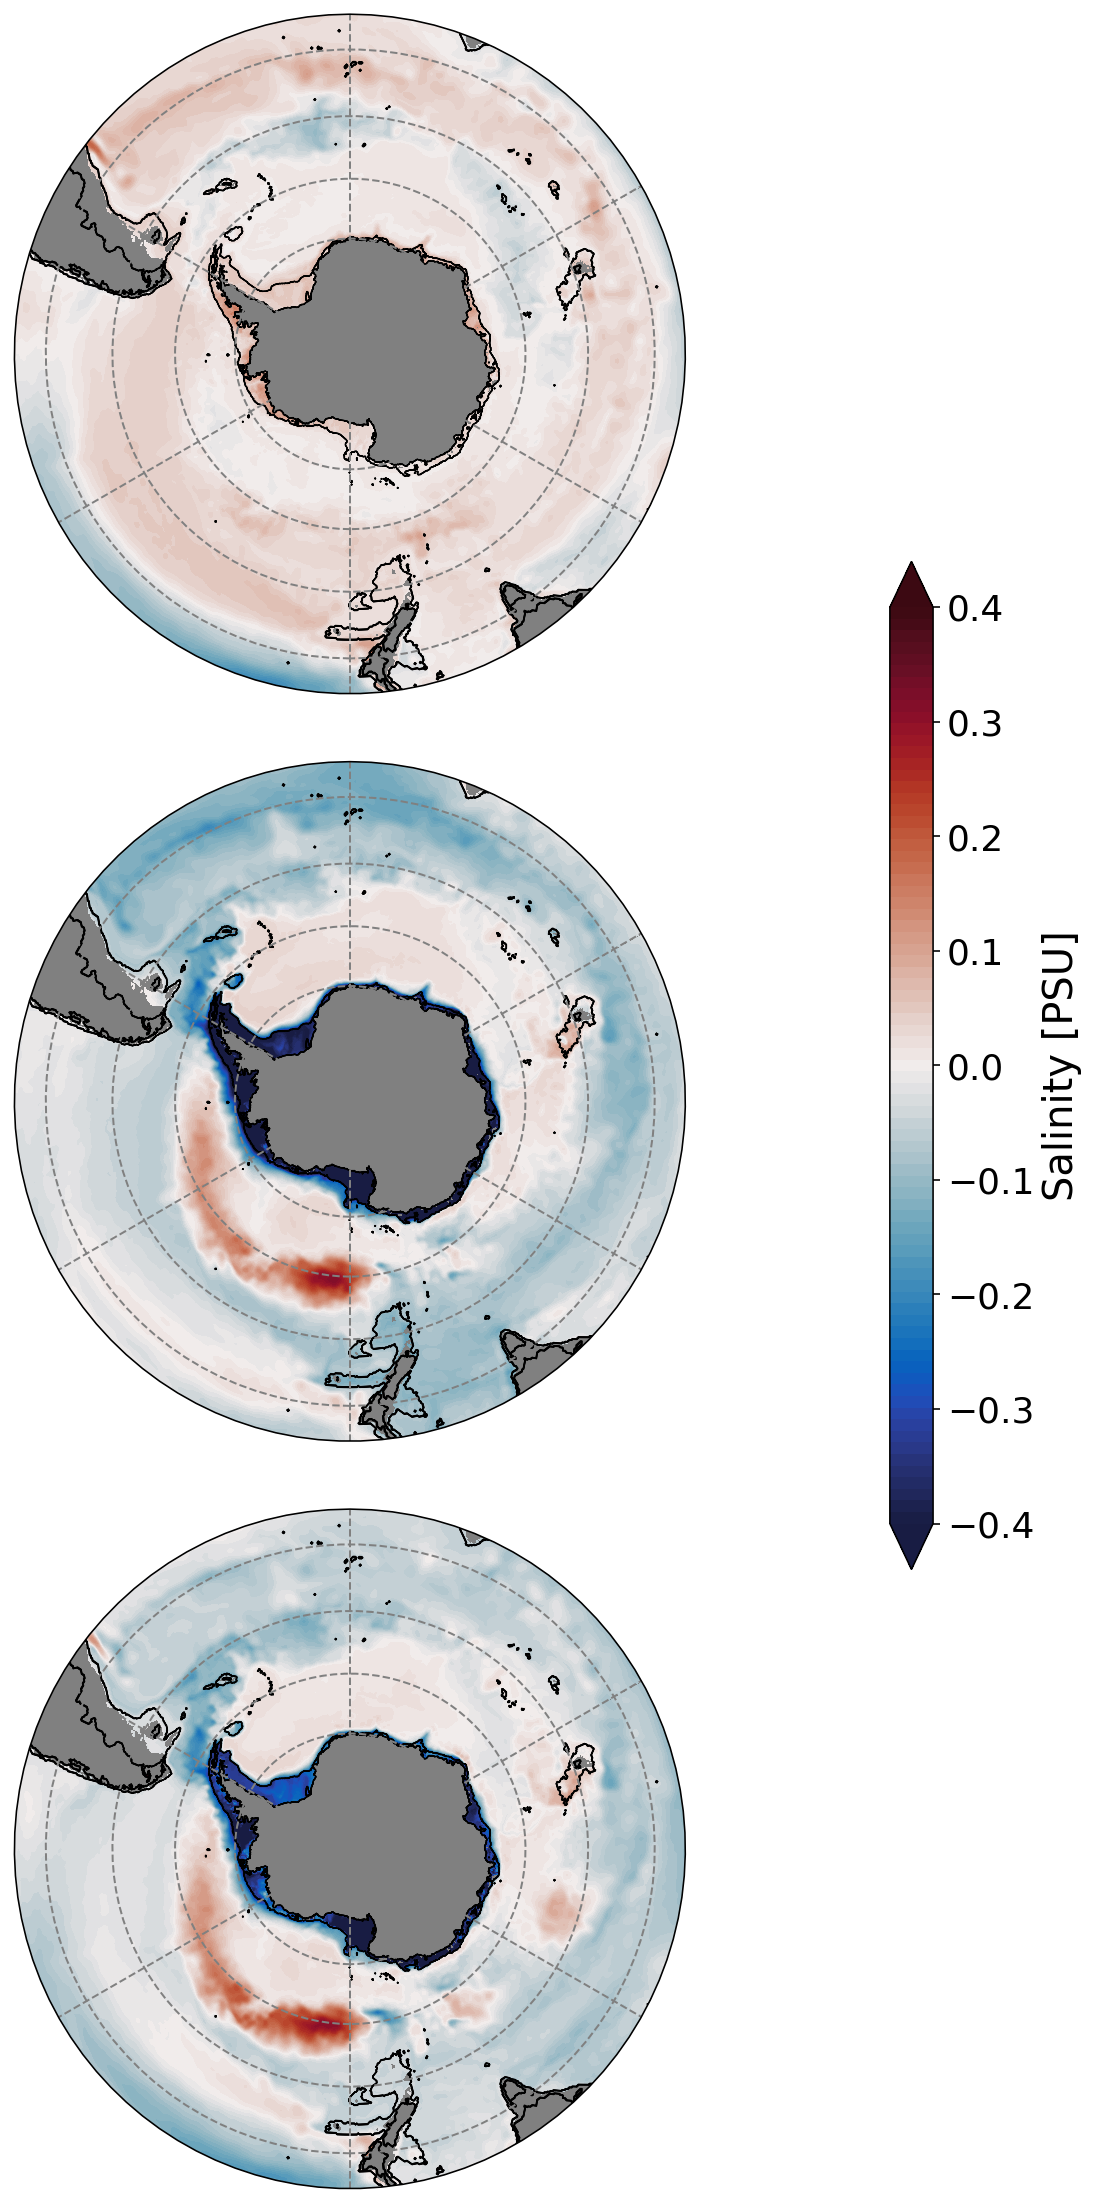

In [152]:
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)
antarctic_map(ax1, grid = True)
antarctic_map(ax2, grid = True)

x_cm4 = ds_static_ocean.xh.values
y_cm4 = ds_static_ocean.yh.sel(yh=slice(-90,-30)).values
x_cm4,y_cm4 = np.meshgrid(x_cm4,y_cm4)

levels_so_diff = np.linspace(-0.40,0.40,80)

ax0.contourf(x_cm4,y_cm4,S_stress_ens_diff_weighted.values,
             levels=levels_so_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

ax1.contourf(x_cm4,y_cm4,S_antwater_ens_diff_weighted.values,
             levels=levels_so_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

ax2.contourf(x_cm4,y_cm4,S_antwaterstress_ens_diff_weighted.values,
             levels=levels_so_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')


### Add Vertical Colorbar on Right
cbr_so_diff = ax0.contourf(x_cm4,y_cm4,S_stress_ens_diff_weighted.values,
             levels=levels_so_diff,
             cmap=cmocean.cm.balance,
             transform=ccrs.PlateCarree(),extend='both')

cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_so_diff,cax=cax,orientation='vertical',shrink=0.5,ticks = [-0.40,-0.30,-0.20,-0.10,0,0.10,0.20,0.30,0.40])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Salinity [PSU]', fontsize=20)

plt.savefig('CM4_200_to_1000m_depth_ave_Salt_Anomaly.pdf')

## Depth-averaged piControl salinty and temperature 100 yr average.

In [137]:
S_cntrl_200_2000_weighted = S_cntrl.so.weighted(vol_weights.fillna(0)).mean(dim='z_l')
S_cntrl_200_2000_weighted_ave = S_cntrl_so_200_2000_weighted.mean(dim='time')

T_cntrl_200_2000_weighted = T_cntrl.thetao.weighted(vol_weights.fillna(0)).mean(dim='z_l')
T_cntrl_200_2000_weighted_ave = T_cntrl_200_2000_weighted.mean(dim='time')

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


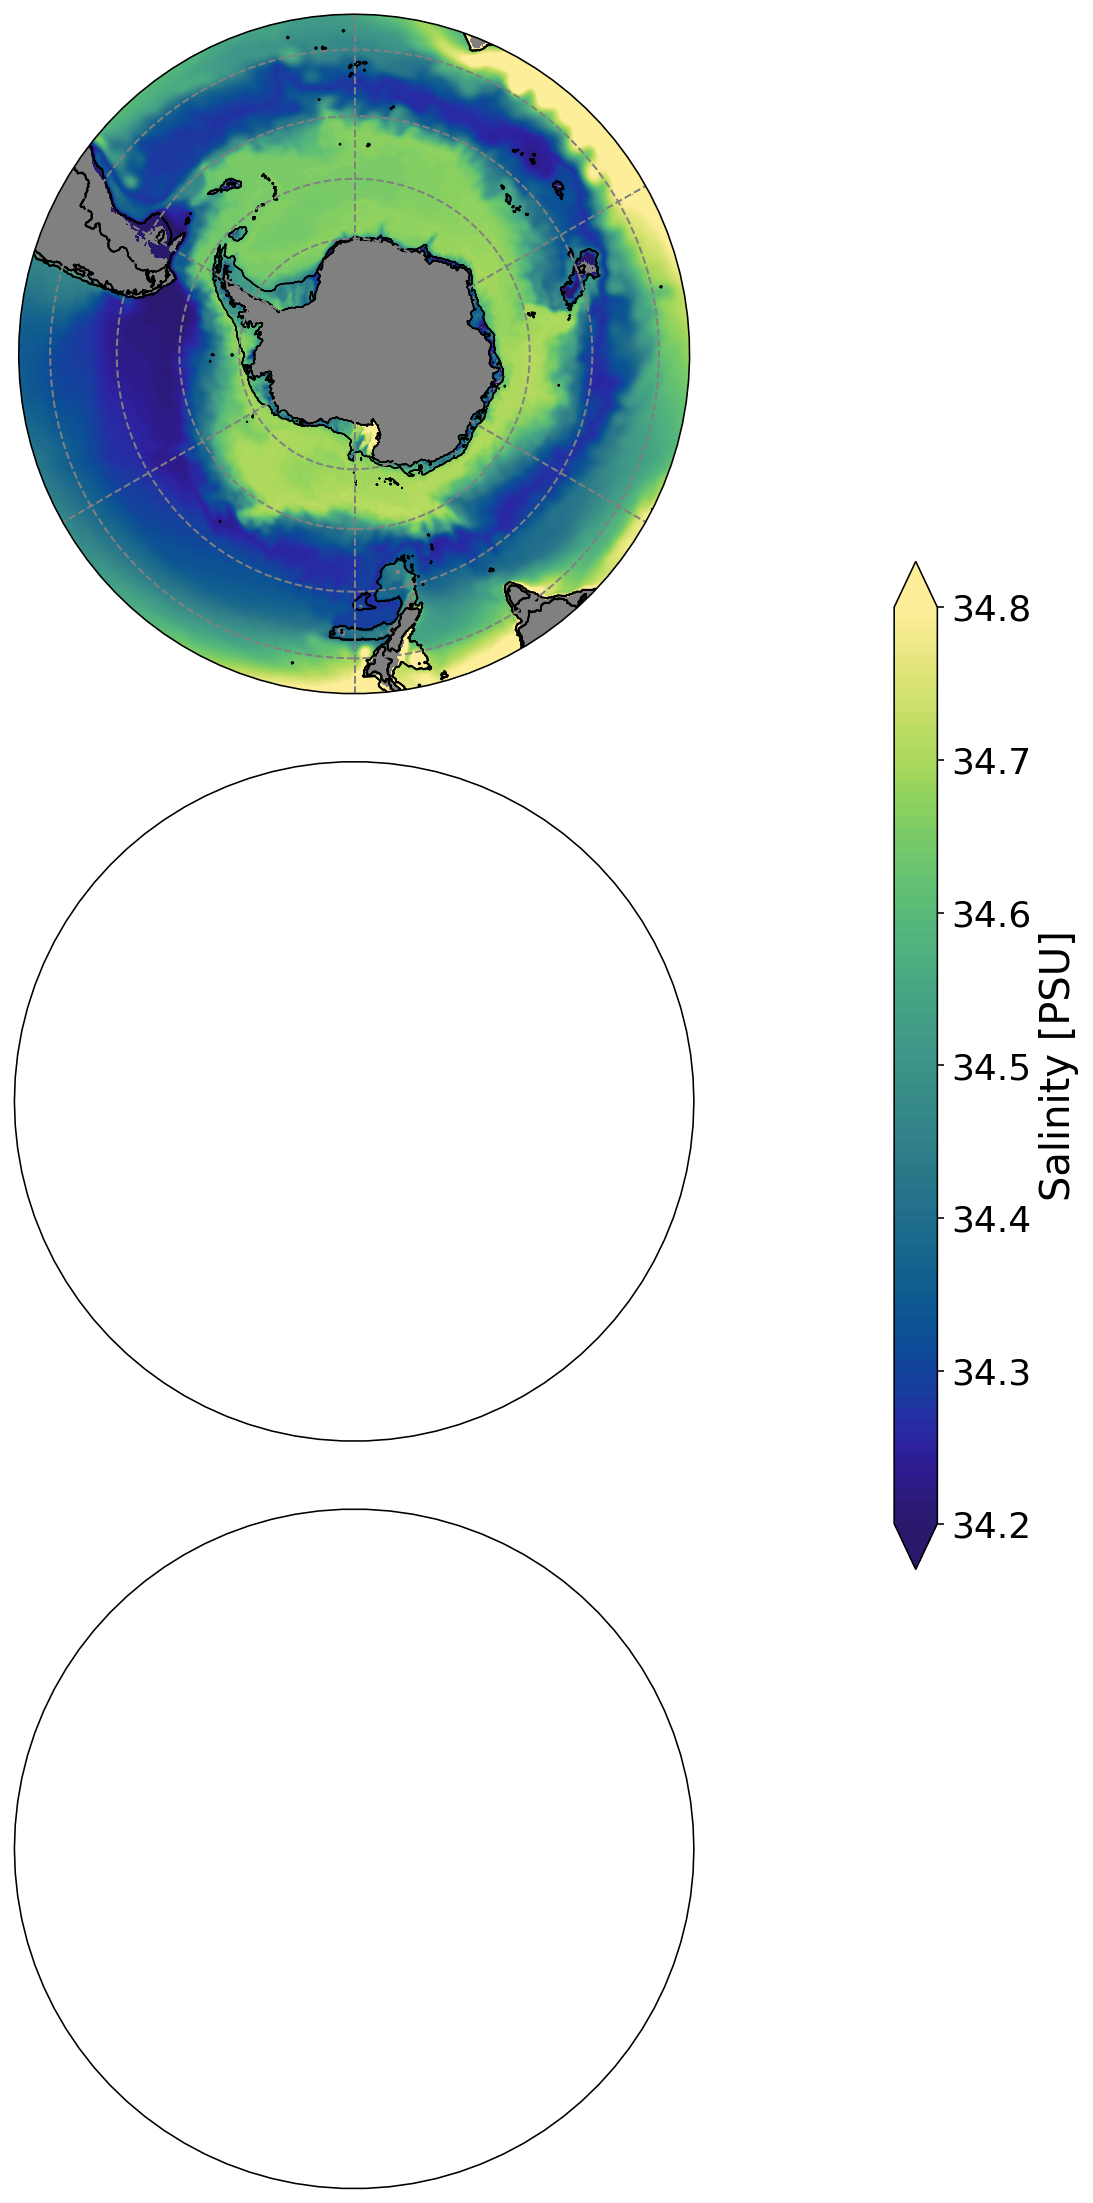

In [140]:
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo()),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo()),

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)

x_cm4 = ds_static_ocean.xh.values
y_cm4 = ds_static_ocean.yh.sel(yh=slice(-90,-30)).values
x_cm4,y_cm4 = np.meshgrid(x_cm4,y_cm4)

levels_salt = np.linspace(34.2,34.8,80)

ax0.contourf(x_cm4,y_cm4,S_cntrl_200_2000_weighted_ave.values,
             levels=levels_salt,
             cmap=cmocean.cm.haline,
             transform=ccrs.PlateCarree(),extend='both')

### Add Vertical Colorbar on Right
cbr_S_diff = ax0.contourf(x_cm4,y_cm4,S_cntrl_200_2000_weighted_ave.values,
             levels=levels_salt,
             cmap=cmocean.cm.haline,
             transform=ccrs.PlateCarree(),extend='both')

cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_S_diff,cax=cax,orientation='vertical',shrink=0.5,ticks = [34.2,34.3,34.4,34.5,34.6,34.7,34.8])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Salinity [PSU]', fontsize=20)

plt.savefig('CM4_200_to_1000m_depth_ave_salinity_piControl_CORRECT.pdf')

/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:982: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/nbhome/Rebecca.Beadling/miniconda/envs/py39/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings

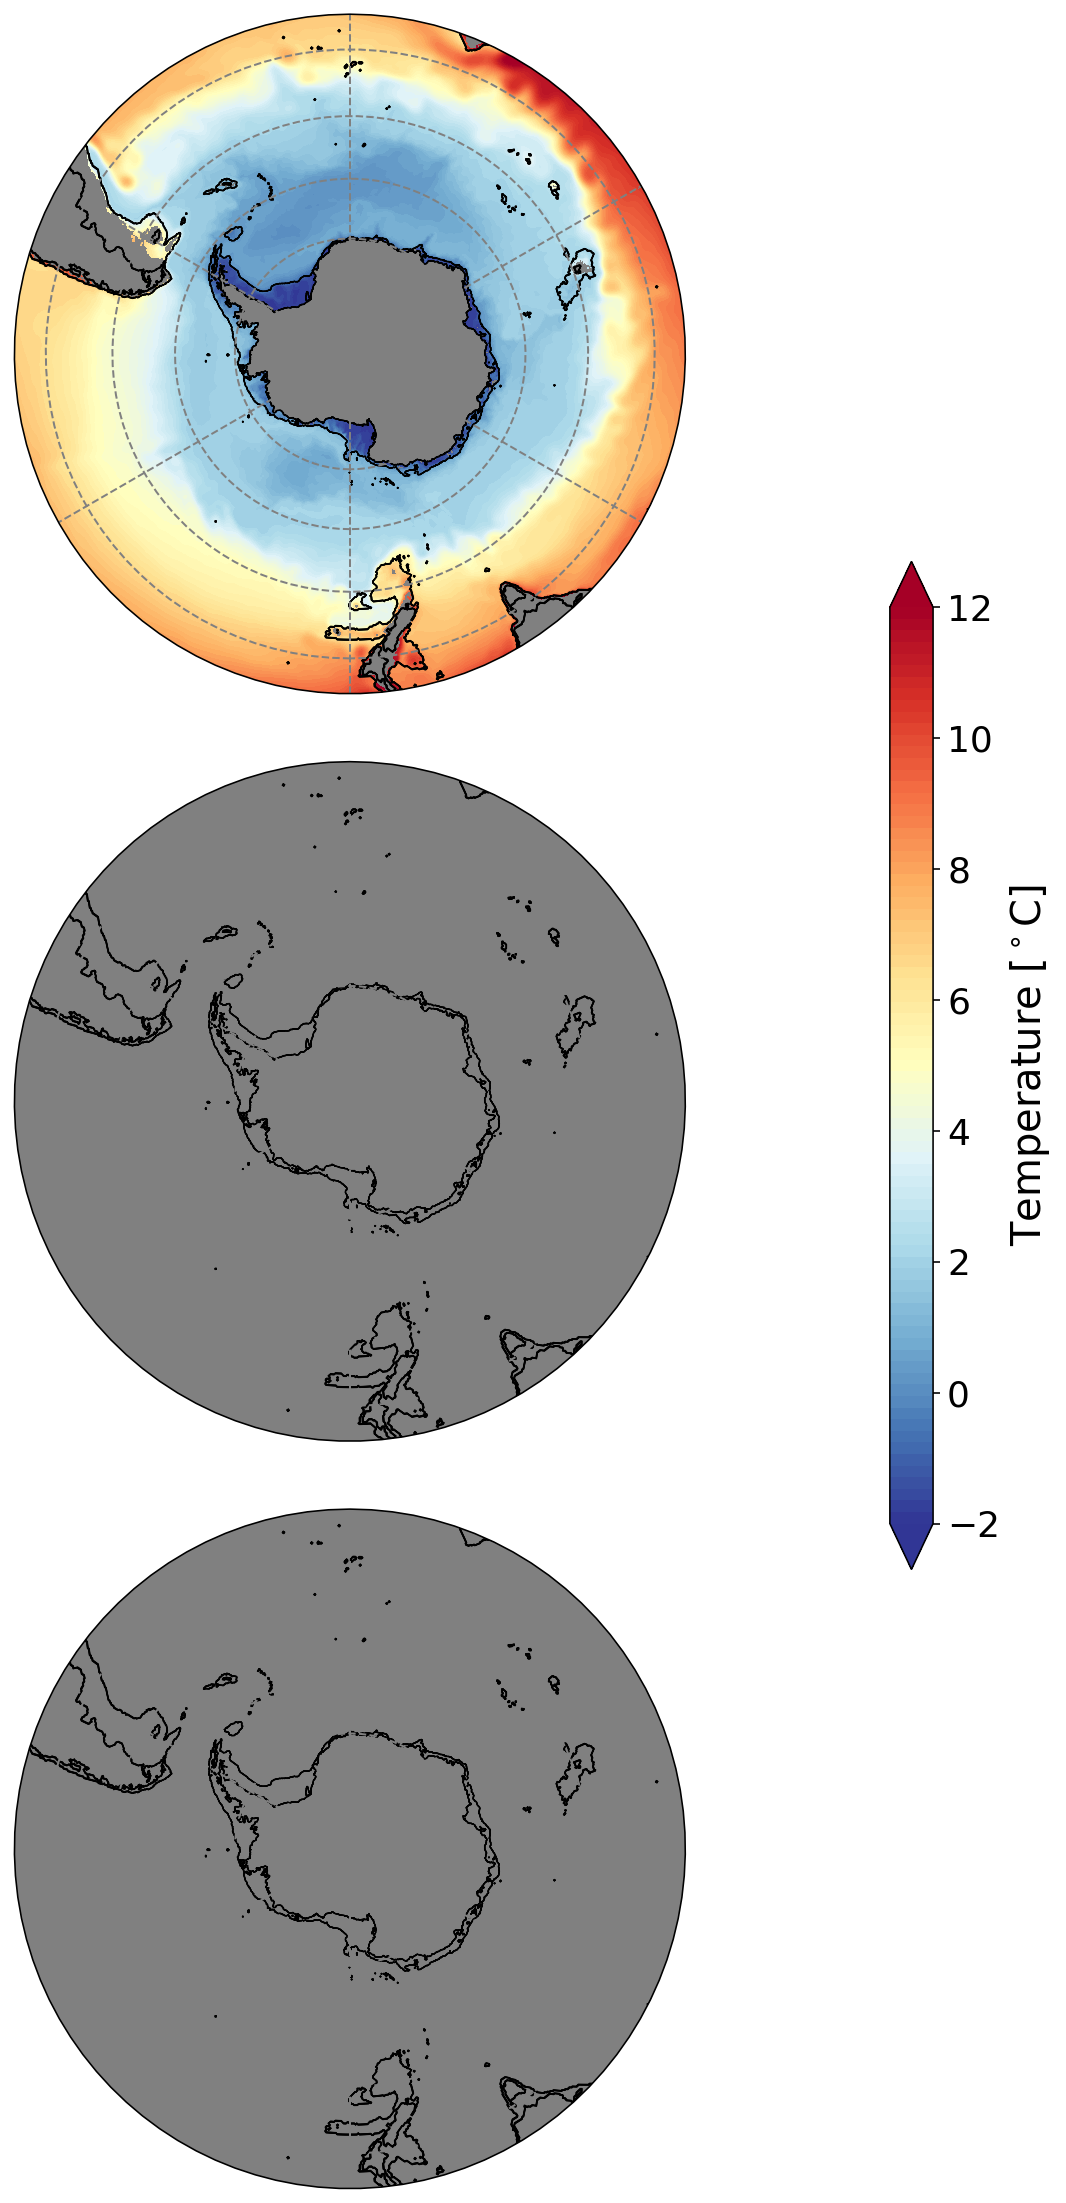

In [141]:
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)
antarctic_map(ax1, grid = True)
antarctic_map(ax2, grid = True)

x_cm4 = ds_static_ocean.xh.values
y_cm4 = ds_static_ocean.yh.sel(yh=slice(-90,-30)).values
x_cm4,y_cm4 = np.meshgrid(x_cm4,y_cm4)

levels_temp = np.linspace(-2,12,80)

ax0.contourf(x_cm4,y_cm4,T_cntrl_200_2000_weighted_ave.values,
             levels=levels_temp,
             cmap='RdYlBu_r',
             transform=ccrs.PlateCarree(),extend='both')


### Add Vertical Colorbar on Right
cbr_temp = ax0.contourf(x_cm4,y_cm4,T_cntrl_200_2000_weighted_ave.values,
             levels=levels_temp,
             cmap='RdYlBu_r',
             transform=ccrs.PlateCarree(),extend='both')

cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_temp,cax=cax,orientation='vertical',shrink=0.5,ticks = [-2,0,2,4,6,8,10,12])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Temperature [$^\circ$C]', fontsize=20)

plt.savefig('CM4_200_to_1000m_depth_ave_temp_piControl_CORRECT.pdf')